In [15]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# **Chia train test validate theo tỉ lệ 8:1:1**

In [16]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BTC.csv')
df1=df.reset_index()['Close']

In [17]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
# 4. Chia train test validate
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [19]:
# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
# 6. Reshape thành X=t,t+1,t+2..t+99  Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [21]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [22]:
# 8. Define SimpleRNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 2s 38ms/step - loss: 0.0273 - val_loss: 6.6640e-04
Epoch 2/100
23/23 [==============================] - 1s 36ms/step - loss: 0.0018 - val_loss: 4.9067e-04
Epoch 3/100
23/23 [==============================] - 1s 37ms/step - loss: 0.0013 - val_loss: 5.6824e-04
Epoch 4/100
23/23 [==============================] - 1s 35ms/step - loss: 0.0012 - val_loss: 3.9710e-04
Epoch 5/100
23/23 [==============================] - 1s 36ms/step - loss: 0.0011 - val_loss: 3.7245e-04
Epoch 6/100
23/23 [==============================] - 1s 29ms/step - loss: 9.9726e-04 - val_loss: 3.4688e-04
Epoch 7/100
23/23 [==============================] - 0s 21ms/step - loss: 9.7731e-04 - val_loss: 3.1132e-04
Epoch 8/100
23/23 [==============================] - 0s 19ms/step - loss: 9.0165e-04 - val_loss: 3.3280e-04
Epoch 9/100
23/23 [==============================] - 0s 20ms/step - loss: 9.1886e-04 - val_loss: 3.1200e-04
Epoch 10/100
23/23 [============================

In [24]:
# 10. Dự báo dữ liệu train, test, val
train_predict = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)

3/3 [==============================] - 0s 7ms/step


In [25]:
# 11. Chuẩn hóa dữ liệu
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_pred_val = scaler.inverse_transform(y_pred_val)

y_test = scaler.inverse_transform(y_test.reshape(-1,1))
y_val = scaler.inverse_transform(y_val.reshape(-1,1))

In [26]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(y_pred_val, y_val)
val_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
val_mape = mean_absolute_percentage_error(y_pred_val, y_val)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)

Testing MAE: 430.78789936095524
Testing RMSE: 664.5944878858231
Testing MAPE: 0.015203971311734506
---------------------------
Validation MAE: 1710.0498265972212
Validation RMSE: 2261.4598408974107
Validation MAPE: 0.027010556431510346


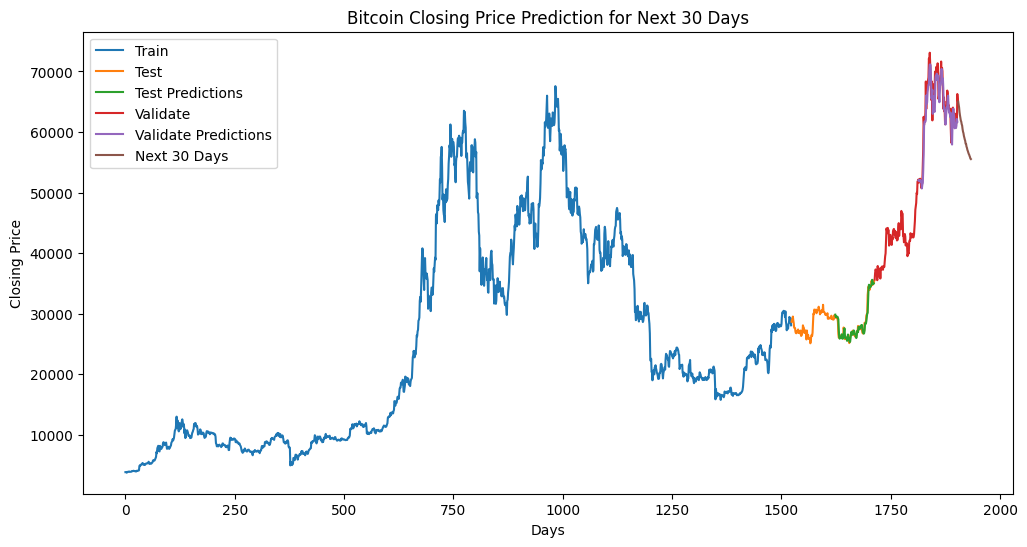

Predicted closing prices for the next 30 days:
[65018.098 64534.418 64094.59  63307.387 62773.613 62336.37  61891.496
 61705.113 61284.215 61064.977 60478.81  60059.074 59812.574 59367.703
 59083.086 58772.863 58540.766 58058.7   58029.86  57578.625 57390.004
 57046.062 56859.465 56626.305 56395.098 56268.72  56039.977 55858.668
 55597.207 55528.742]


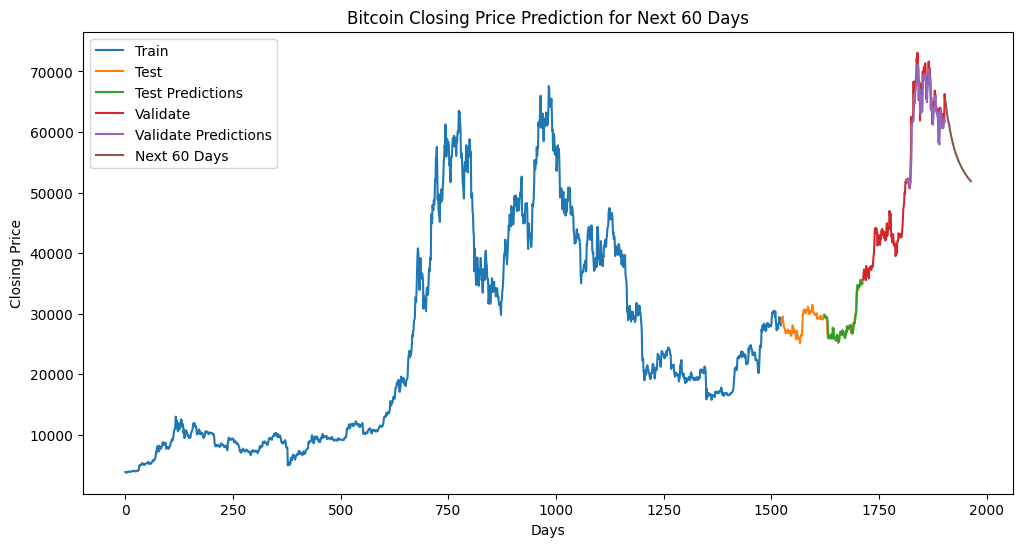

Predicted closing prices for the next 60 days:
[65018.098 64534.418 64094.59  63307.387 62773.613 62336.37  61891.496
 61705.113 61284.215 61064.977 60478.81  60059.074 59812.574 59367.703
 59083.086 58772.863 58540.766 58058.7   58029.86  57578.625 57390.004
 57046.062 56859.465 56626.305 56395.098 56268.72  56039.977 55858.668
 55597.207 55528.742 55226.957 55162.926 54901.145 54813.535 54615.15
 54503.973 54360.234 54199.508 54069.51  53915.176 53817.332 53653.953
 53556.695 53419.297 53324.664 53205.684 53113.15  52997.324 52875.574
 52778.426 52665.11  52577.22  52465.96  52394.914 52285.668 52221.777
 52128.957 52052.99  51961.895 51880.062]


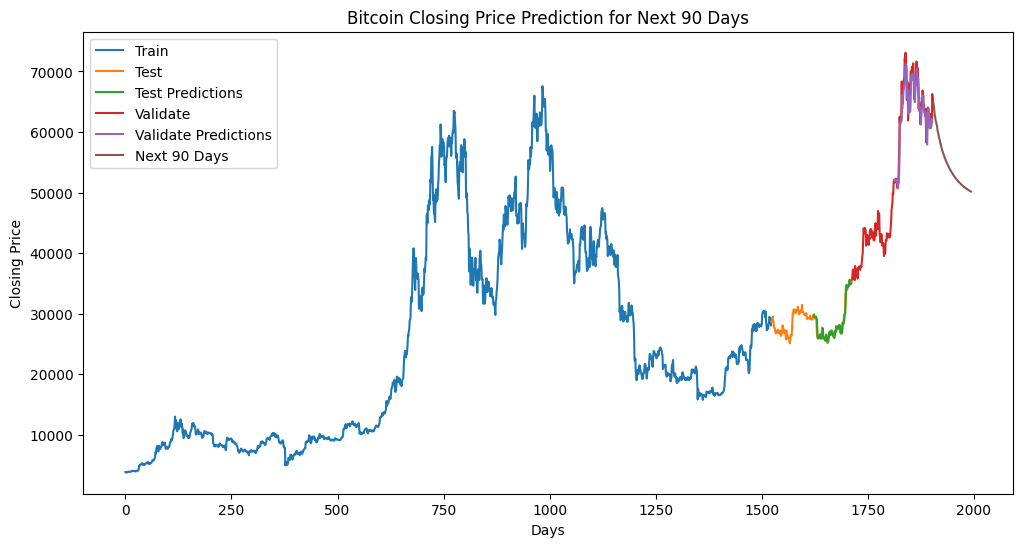

Predicted closing prices for the next 90 days:
[65018.098 64534.418 64094.59  63307.387 62773.613 62336.37  61891.496
 61705.113 61284.215 61064.977 60478.81  60059.074 59812.574 59367.703
 59083.086 58772.863 58540.766 58058.7   58029.86  57578.625 57390.004
 57046.062 56859.465 56626.305 56395.098 56268.72  56039.977 55858.668
 55597.207 55528.742 55226.957 55162.926 54901.145 54813.535 54615.15
 54503.973 54360.234 54199.508 54069.51  53915.176 53817.332 53653.953
 53556.695 53419.297 53324.664 53205.684 53113.15  52997.324 52875.574
 52778.426 52665.11  52577.22  52465.96  52394.914 52285.668 52221.777
 52128.957 52052.99  51961.895 51880.062 51800.39  51722.42  51648.336
 51575.355 51508.285 51437.062 51376.887 51307.55  51242.773 51176.188
 51114.85  51054.15  50994.17  50938.227 50880.758 50827.42  50773.992
 50722.96  50669.137 50618.77  50569.617 50521.734 50474.78  50428.145
 50382.973 50336.844 50294.86  50251.805 50211.13  50168.977]


In [27]:
# 13. Dự đoán cho 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

     # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    plt.plot(range(len(train_data) + len(test_data), len(train_data) + len(test_data) + len(val_data)), scaler.inverse_transform(val_data), label='Validate')
    plt.plot(range(len(train_data) + len(test_data) + time_step, len(train_data) + len(test_data) + time_step + len(y_pred_val)), y_pred_val, label='Validate Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test validate theo tỉ lệ 7:2:1**

In [28]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BTC.csv')
df1=df.reset_index()['Close']

In [29]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [30]:
# 4. Chia train test validate
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [31]:
# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [32]:
# 6. Reshape thành X=t,t+1,t+2..t+99  Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [33]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [34]:
# 8. Define SimpleRNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [35]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 2s 53ms/step - loss: 0.0195 - val_loss: 0.0039
Epoch 2/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0014 - val_loss: 5.0234e-04
Epoch 3/100
20/20 [==============================] - 1s 38ms/step - loss: 7.3329e-04 - val_loss: 2.3040e-04
Epoch 4/100
20/20 [==============================] - 1s 39ms/step - loss: 6.7357e-04 - val_loss: 1.8460e-04
Epoch 5/100
20/20 [==============================] - 1s 41ms/step - loss: 6.3384e-04 - val_loss: 1.6782e-04
Epoch 6/100
20/20 [==============================] - 1s 37ms/step - loss: 6.2617e-04 - val_loss: 2.7763e-04
Epoch 7/100
20/20 [==============================] - 1s 38ms/step - loss: 5.8928e-04 - val_loss: 2.4309e-04
Epoch 8/100
20/20 [==============================] - 1s 45ms/step - loss: 6.0331e-04 - val_loss: 1.9248e-04
Epoch 9/100
20/20 [==============================] - 1s 38ms/step - loss: 5.4358e-04 - val_loss: 1.4900e-04
Epoch 10/100
20/20 [====================

In [36]:
# 10. Dự báo dữ liệu train, test, val
train_predict = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)

3/3 [==============================] - 0s 8ms/step


In [37]:
# 11. Chuẩn hóa dữ liệu
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_pred_val = scaler.inverse_transform(y_pred_val)

y_test = scaler.inverse_transform(y_test.reshape(-1,1))
y_val = scaler.inverse_transform(y_val.reshape(-1,1))

In [38]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(y_pred_val, y_val)
val_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
val_mape = mean_absolute_percentage_error(y_pred_val, y_val)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)

Testing MAE: 835.4353155017919
Testing RMSE: 973.4369117034032
Testing MAPE: 0.029611665153029747
---------------------------
Validation MAE: 1559.4049618543947
Validation RMSE: 2084.246387478269
Validation MAPE: 0.024471336728119103


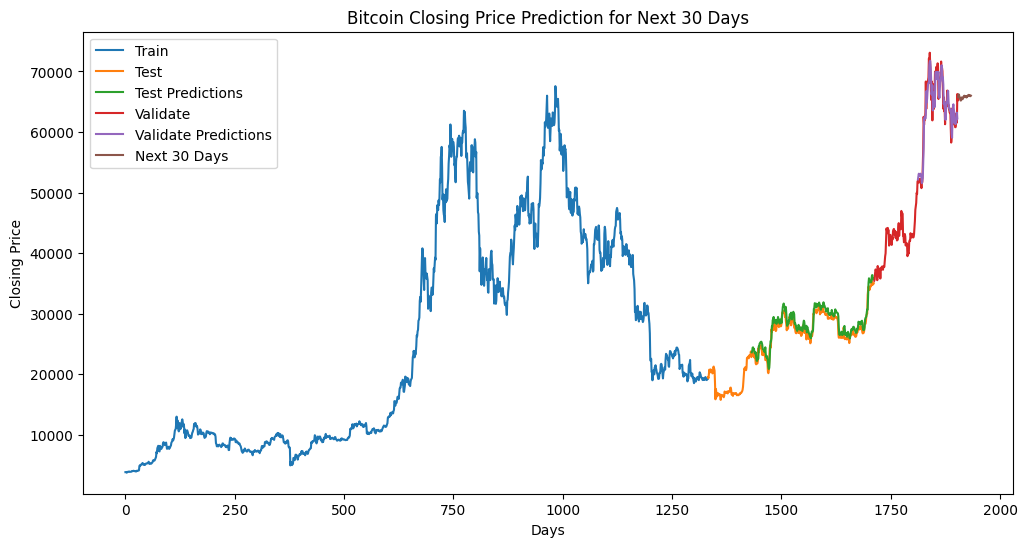

Predicted closing prices for the next 30 days:
[65787.26  66228.    66096.3   65660.76  65550.32  65303.42  65182.027
 65696.77  65679.734 65668.4   65401.082 65650.6   65650.19  65940.52
 65989.12  65856.26  65908.266 65758.25  65803.87  65693.97  65929.15
 65834.36  66014.984 65982.45  66123.55  66017.3   66068.87  65923.61
 65912.88  65994.94 ]


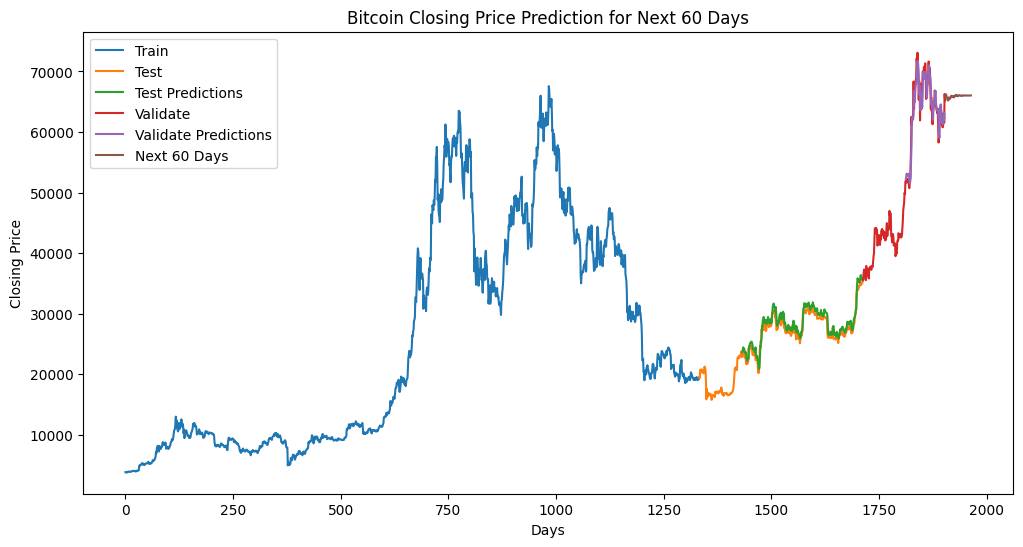

Predicted closing prices for the next 60 days:
[65787.26  66228.    66096.3   65660.76  65550.32  65303.42  65182.027
 65696.77  65679.734 65668.4   65401.082 65650.6   65650.19  65940.52
 65989.12  65856.26  65908.266 65758.25  65803.87  65693.97  65929.15
 65834.36  66014.984 65982.45  66123.55  66017.3   66068.87  65923.61
 65912.88  65994.94  65951.72  66034.74  66070.45  66072.08  66023.83
 65985.75  65963.94  65956.19  66026.87  65986.59  66023.22  66026.984
 66021.32  66006.33  66032.82  66011.94  66041.17  66019.59  66037.02
 66019.91  66028.04  66007.56  66002.01  66012.12  66012.234 66026.35
 66024.74  66041.83  66027.69  66027.37 ]


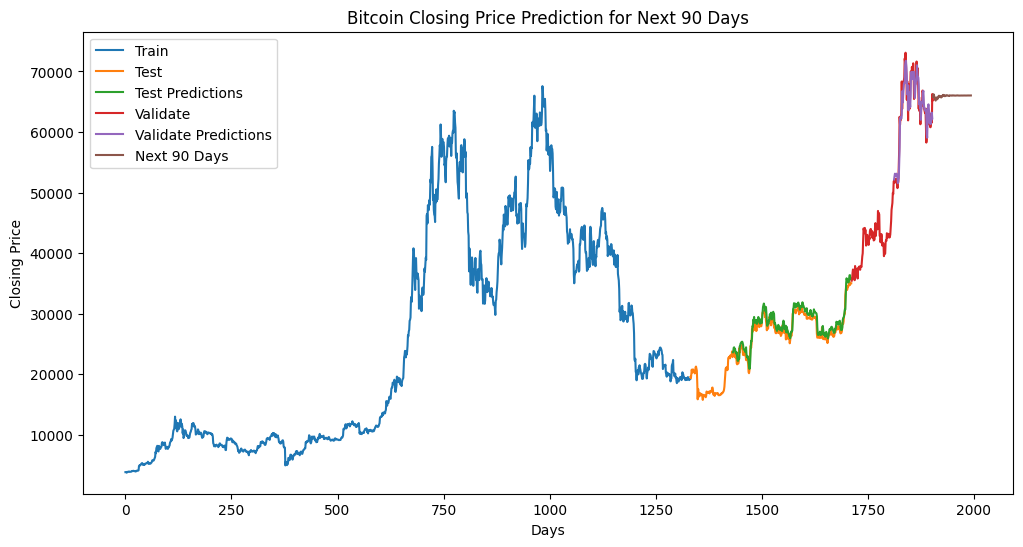

Predicted closing prices for the next 90 days:
[65787.26  66228.    66096.3   65660.76  65550.32  65303.42  65182.027
 65696.77  65679.734 65668.4   65401.082 65650.6   65650.19  65940.52
 65989.12  65856.26  65908.266 65758.25  65803.87  65693.97  65929.15
 65834.36  66014.984 65982.45  66123.55  66017.3   66068.87  65923.61
 65912.88  65994.94  65951.72  66034.74  66070.45  66072.08  66023.83
 65985.75  65963.94  65956.19  66026.87  65986.59  66023.22  66026.984
 66021.32  66006.33  66032.82  66011.94  66041.17  66019.59  66037.02
 66019.91  66028.04  66007.56  66002.01  66012.12  66012.234 66026.35
 66024.74  66041.83  66027.69  66027.37  66013.88  66009.63  66009.18
 66012.66  66011.76  66016.48  66023.734 66013.76  66021.016 66014.57
 66018.555 66016.09  66023.22  66018.484 66025.74  66020.1   66019.65
 66017.89  66018.13  66019.14  66021.88  66026.16  66025.08  66028.32
 66023.82  66024.7   66023.266 66026.07  66028.69  66030.49 ]


In [39]:
# 13. Dự đoán cho 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

     # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    plt.plot(range(len(train_data) + len(test_data), len(train_data) + len(test_data) + len(val_data)), scaler.inverse_transform(val_data), label='Validate')
    plt.plot(range(len(train_data) + len(test_data) + time_step, len(train_data) + len(test_data) + time_step + len(y_pred_val)), y_pred_val, label='Validate Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test validate theo tỉ lệ 6:2:2**

In [40]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BTC.csv')
df1=df.reset_index()['Close']

In [41]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [42]:
# 4. Chia train test validate
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [43]:
# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [44]:
# 6. Reshape thành X=t,t+1,t+2..t+99  Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [45]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [46]:
# 8. Define SimpleRNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [47]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
17/17 [==============================] - 2s 37ms/step - loss: 0.0778 - val_loss: 0.0032
Epoch 2/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0044 - val_loss: 0.0015
Epoch 3/100
17/17 [==============================] - 0s 25ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 4/100
17/17 [==============================] - 0s 23ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 5/100
17/17 [==============================] - 0s 24ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 6/100
17/17 [==============================] - 0s 23ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 7/100
17/17 [==============================] - 1s 33ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 8/100
17/17 [==============================] - 1s 36ms/step - loss: 0.0022 - val_loss: 8.7949e-04
Epoch 9/100
17/17 [==============================] - 1s 47ms/step - loss: 0.0021 - val_loss: 9.6964e-04
Epoch 10/100
17/17 [==============================] - 1s 46ms/step - loss: 0.0021 - val_loss

In [48]:
# 10. Dự báo dữ liệu train, test, val
train_predict = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)

9/9 [==============================] - 0s 7ms/step


In [49]:
# 11. Chuẩn hóa dữ liệu
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_pred_val = scaler.inverse_transform(y_pred_val)

y_test = scaler.inverse_transform(y_test.reshape(-1,1))
y_val = scaler.inverse_transform(y_val.reshape(-1,1))

In [50]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(y_pred_val, y_val)
val_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
val_mape = mean_absolute_percentage_error(y_pred_val, y_val)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)

Testing MAE: 692.4816836099914
Testing RMSE: 955.0974349473498
Testing MAPE: 0.03315250832293874
---------------------------
Validation MAE: 1855.6100705182382
Validation RMSE: 2441.488236158787
Validation MAPE: 0.04102206457438336


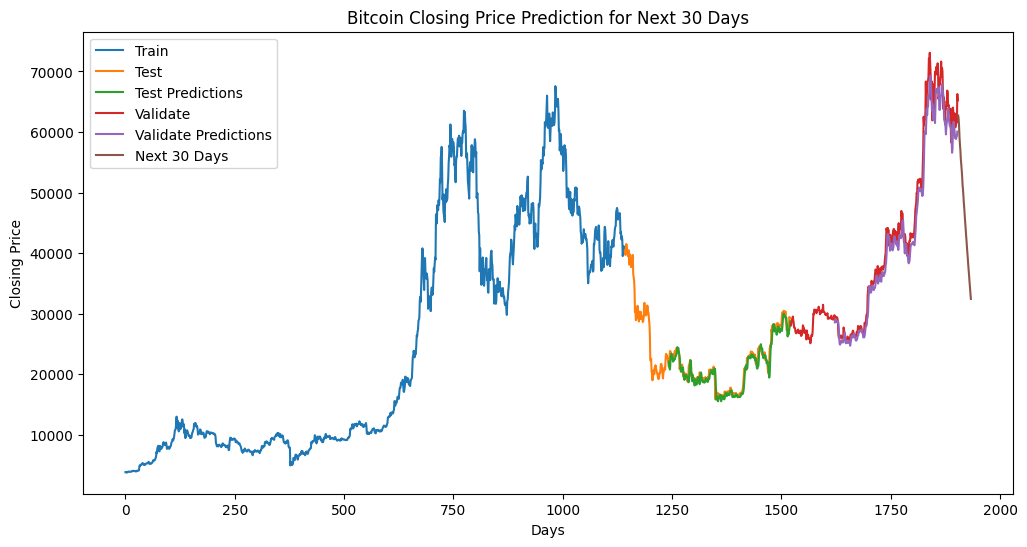

Predicted closing prices for the next 30 days:
[62719.254 62192.184 60972.02  59145.887 57962.99  57002.586 55533.395
 54692.4   53740.3   52650.73  51290.46  50505.28  49339.375 48221.023
 47271.63  46123.234 45093.36  44091.52  43027.8   42068.977 41022.71
 40030.24  39073.7   38066.89  37113.867 36174.742 35189.98  34302.29
 33339.195 32442.064]


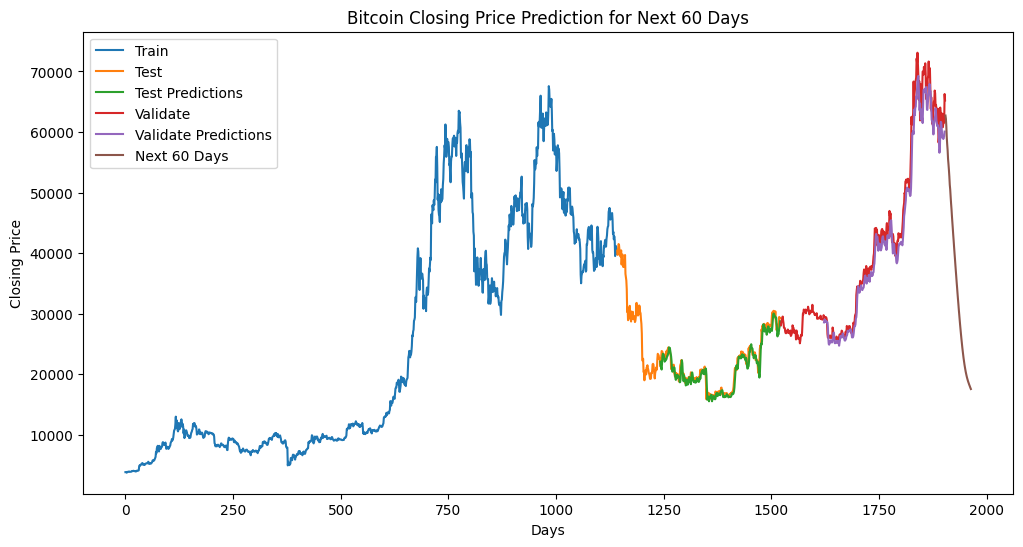

Predicted closing prices for the next 60 days:
[62719.254 62192.184 60972.02  59145.887 57962.99  57002.586 55533.395
 54692.4   53740.3   52650.73  51290.46  50505.28  49339.375 48221.023
 47271.63  46123.234 45093.36  44091.52  43027.8   42068.977 41022.71
 40030.24  39073.7   38066.89  37113.867 36174.742 35189.98  34302.29
 33339.195 32442.064 31581.957 30660.855 29836.826 28985.615 28156.611
 27388.04  26617.203 25880.39  25198.818 24499.277 23879.223 23273.926
 22692.191 22189.475 21676.625 21231.744 20820.107 20421.734 20082.361
 19757.596 19459.436 19207.293 18951.637 18729.52  18526.861 18310.875
 18133.965 17939.066 17746.908 17574.516]


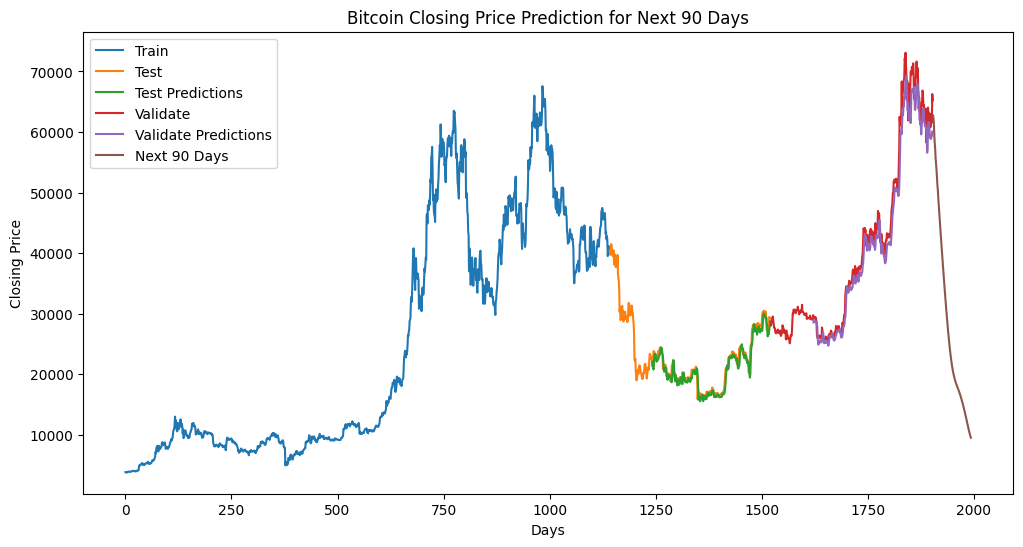

Predicted closing prices for the next 90 days:
[62719.254 62192.184 60972.02  59145.887 57962.99  57002.586 55533.395
 54692.4   53740.3   52650.73  51290.46  50505.28  49339.375 48221.023
 47271.63  46123.234 45093.36  44091.52  43027.8   42068.977 41022.71
 40030.24  39073.7   38066.89  37113.867 36174.742 35189.98  34302.29
 33339.195 32442.064 31581.957 30660.855 29836.826 28985.615 28156.611
 27388.04  26617.203 25880.39  25198.818 24499.277 23879.223 23273.926
 22692.191 22189.475 21676.625 21231.744 20820.107 20421.734 20082.361
 19757.596 19459.436 19207.293 18951.637 18729.52  18526.861 18310.875
 18133.965 17939.066 17746.908 17574.516 17370.85  17185.97  16983.771
 16768.854 16558.54  16331.454 16092.114 15861.555 15600.608 15347.501
 15085.957 14800.368 14534.343 14236.344 13948.133 13653.533 13344.229
 13039.407 12731.22  12407.37  12099.597 11778.467 11459.702 11157.774
 10841.69  10554.708 10270.58   9999.152  9761.993  9532.702]


In [51]:
# 13. Dự đoán cho 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

     # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    plt.plot(range(len(train_data) + len(test_data), len(train_data) + len(test_data) + len(val_data)), scaler.inverse_transform(val_data), label='Validate')
    plt.plot(range(len(train_data) + len(test_data) + time_step, len(train_data) + len(test_data) + time_step + len(y_pred_val)), y_pred_val, label='Validate Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())